# Object Oriented Programming

* Classes have both data and functions
* Used to organize related data and functions in one place
* Provides a way to modularize code

#  How do objects and classes relate?

Objects are to classes as cookies are to cookie cutters. Instances are objects of a particular class.

![classes objects and instances](./images/classes-objects-and-instances.jpg)

cite: https://www.google.com/url?sa=i&rct=j&q=&esrc=s&source=images&cd=&cad=rja&uact=8&ved=2ahUKEwiR7tzSptvaAhUFw4MKHe6TDC4QjRx6BAgAEAU&url=https%3A%2F%2Fwww.wayfair.com%2Fkitchen-tabletop%2Fpdp%2Fcake-boss-26-piece-stainless-steel-alphabet-fondant-cookie-cutter-set-bqss1517.html&psig=AOvVaw2brg-fv0zDhu0684Ar9Hom&ust=1524947591228289

# Examples uses of OO

Let's say you need to write a program that represents:

* Board Games - You probably want classes that represent the board, players, and you need a way to generate moves and track the score, and ...

* Musical Instruments - An extensible collection of instruments that can be played and tuned.  Lets start with a few stringed instruments.

In [ ]:
class Instrument:
    def __init__(self, name):
        self.name = name
        
    def play(self, music):
        pass
        
class Brass(Instrument):
    def __init__(self, name):
        super().__init__(name)
        
class Trumpet(Brass):
    def __init__(self, values)
        super().__init__(self, 'trumpet')
        
    def play(self, music):
        print(self.name, 'now playing', end=' ')
        for note in music:
            print(note)       

In [23]:
# Let's represent a possible instrument class hierarchy
# Making it meta let's also use an OO graphviz package 
# FIRST: conda install graphviz python-graphviz
from graphviz import Digraph
import tempfile

# LATER: create an instance of the digraph class
# DAG == Directed Acyclic Graph
dag = Digraph(comment='classes of instruments')

# AFTER THAT: dynamically add a data member to flip the graph 
# ignore this code for now
dag.attr(rankdir='BT')

# NEXT: create nodes by calling the node method on the dot object
# think of methods as functions that belongs to an object
# an object is an instance of a class
dag.node('I', 'Instrument')
dag.node('B', 'Brass')
dag.node('T', 'Trumpet')
dag.node('F', 'French Horn')
dag.node('S', 'String')
dag.node('G', 'Electic Guitar')

# THEN: create the edges linking the nodes
dag.edges(['BI', 'TB', 'FB', 'SI', 'GS'])

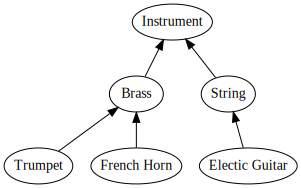

In [24]:
# FINALLY: display the graph
dag

# Programming Language Types
+ Imperative
    - Examples: C, R
    - Sequences of steps like a recipe (How)
    - Variables and functions
+ Functional
    - Examples: Clojure, Erlang 
    - Uses results returned by functions only
    - Functions but NO variables
+ Declarative
    - Examples: SQL 
    - Describe what you want, not how to do it (What)
    - Statements constructed of built in functions
+ Object Oriented
    - Examples: Scala, Python
    - Message passing between objects representing aspects of the problem space
    - Functions and variables contained in objects
    

# DRY == Don't Repeat Yourself

* Idea
    - Behaviors should be implemented in one place
    - Fix it once and be done
* How is accomplished?
    - By containing the behavior in a function or a class
* Try applying DRY with improves code
* Fundamental principle of software engineering